In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn
import json
import ast
from ast import literal_eval
from collections import Counter

In [2]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Danish Datasets

## Open Source Dataset

In [ ]:
opsrc = pd.read_csv('da/opensource.csv', index_col=0)
print("Shape of data=>", opsrc.shape)
opsrc.head(5)

# Shape of data=> (336, 5)

In [4]:
opsrc.isnull().sum()

themes       1
headline     0
text         0
num_words    0
duid         0
dtype: int64

In [5]:
opsrc = opsrc[opsrc['themes'].notna()]
opsrc.shape

(335, 5)

<AxesSubplot:title={'center':'Num. of words per doc. distribution'}, ylabel='Frequency'>

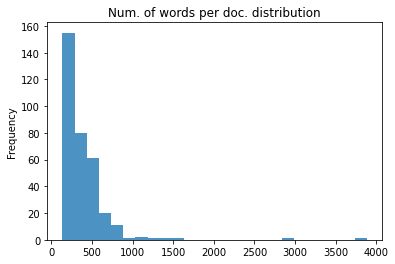

In [10]:
opsrc['num_words'].plot.hist(bins=25, alpha=0.8, legend=False, title="Num. of words per doc. distribution", xlabel='Words per doc.')

In [41]:
opsrc['keywords'] = opsrc['themes']
del opsrc['themes']

In [43]:
opsrc.keywords = opsrc.keywords.astype(str)
opsrc.text = opsrc.text.astype(str)
opsrc.headline = opsrc.headline.astype(str)

Counter({3: 131, 4: 103, 2: 86, 1: 11, 5: 4})


Text(0.5, 0, 'Length of keywords')

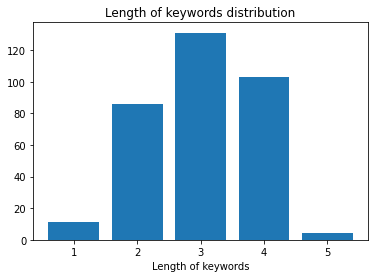

In [45]:
acc = []
for i, row in opsrc.iterrows():
    acc.append(len(row['keywords'].split()))
c = Counter(acc)
print(c)
plt.bar(c.keys(), c.values())
plt.title("Length of keywords distribution")
plt.xlabel("Length of keywords")

In [54]:
opsrc['keywords'] = opsrc.apply(lambda row: [row['keywords']], axis=1)

In [56]:
#opsrc.reset_index(drop=True, inplace=True)
opsrc.to_csv('da/opensource.csv')

### 335 articles with usually less than 900 words, although majority are around 200-300 words

## DaNewsroom

In [125]:
with open("da/danewsroom_test.txt", "r") as f:
    rows = json.load(f)
danews = pd.DataFrame(rows)

In [126]:
danews['num_words'] = danews.apply(lambda row: len(row['text'].split()), axis=1)
danews[danews['num_words'] < 100].count()

text         9411
headline     9411
summary      9411
url          9411
num_words    9411
dtype: int64

In [ ]:
danews = danews[danews['num_words'] >= 100].reset_index(drop=True)
print("Shape of data=>", danews.shape)
danews.head(5)

# Shape of data=> (103868, 5)

In [128]:
print(f'Number of articles with more than 400 words: {danews[danews["num_words"] > 400].count()[0]}')
print(f'Number of articles with more than 700 words: {danews[danews["num_words"] > 700].count()[0]}')

Number of articles with more than 400 words: 30165
Number of articles with more than 700 words: 9044


<AxesSubplot:title={'center':'Num. of words per doc. distribution'}, ylabel='Frequency'>

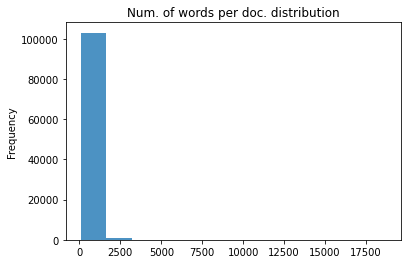

In [129]:
danews.plot.hist(bins=12, alpha=0.8, legend=False, title="Num. of words per doc. distribution", xlabel='Words per doc.')

In [132]:
#danews[danews['num_words'] > round(danews["num_words"].quantile(0.99))].count() # with 99% quantile [1490 words] -> 1038 rows removed
danews = danews[danews['num_words'] <= round(danews["num_words"].quantile(0.99))].reset_index(drop=True)

Shape of data=> (102830, 5)


<AxesSubplot:title={'center':'Num. of words per doc. distribution'}, ylabel='Frequency'>

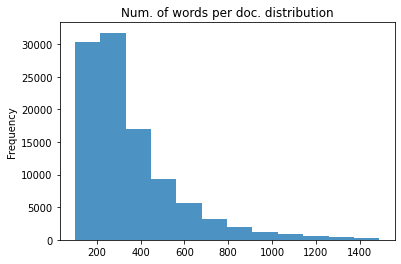

In [135]:
print("Shape of data=>", danews.shape)
danews.plot.hist(bins=12, alpha=0.8, legend=False, title="Num. of words per doc. distribution", xlabel='Words per doc.')

In [134]:
len(danews['text'].unique()) # no duplicates

102830

Text(0.5, 0, 'Length of summaries')

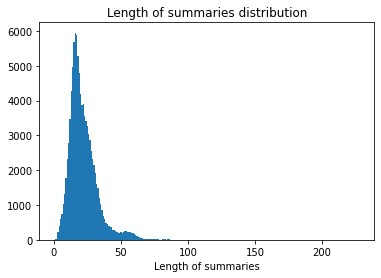

In [6]:
acc = []
for i, row in danews.iterrows():
    acc.append(len(row['summary'].split()))
c = Counter(acc)
plt.bar(c.keys(), c.values(), width=1.0)
plt.title("Length of summaries distribution")
plt.xlabel("Length of summaries")

In [136]:
danews.to_csv('da/da_newsroom.csv')

# Internal SV

In [ ]:
sv_themes = pd.read_csv('sv/sv_themes.csv', index_col=0)
print("Shape of data=>", sv_themes.shape)
sv_themes.head(5)

# Shape of data=> (55, 5)

<AxesSubplot:title={'center':'Num. of words per doc. distribution'}, ylabel='Frequency'>

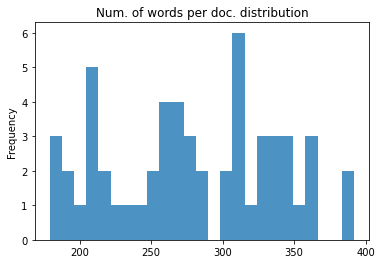

In [3]:
sv_themes['num_words'].plot.hist(bins=25, alpha=0.8, legend=False, title="Num. of words per doc. distribution", xlabel='Words per doc.')

<AxesSubplot:title={'center':'Num. of keywords per doc. distribution'}, ylabel='Frequency'>

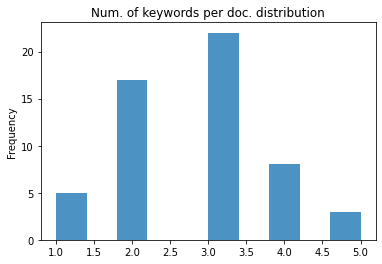

In [6]:
sv_themes.num_themes.plot.hist(bins=10, alpha=0.8, legend=False, title="Num. of keywords per doc. distribution", xlabel='Keywords per doc.')

Counter({2: 52, 3: 42, 1: 40, 4: 17, 5: 1})


Text(0.5, 0, 'Length of themes')

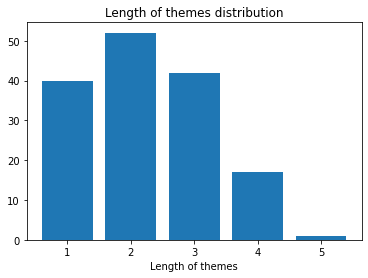

In [23]:
acc = []
for i, row in sv_themes.iterrows():
    for theme in literal_eval(row['theme']):
        acc.append(len(theme.split()))
c = Counter(acc)
print(c)
plt.bar(c.keys(), c.values())
plt.title("Length of themes distribution")
plt.xlabel("Length of themes")

In [ ]:
#sv_themes.reset_index(drop=True, inplace=True)
#sv_themes.to_csv('no/no_themes.csv')

# Internal NO

In [ ]:
no_themes = pd.read_csv('no/no_themes.csv', index_col=0)
print("Shape of data=>", no_themes.shape)
no_themes.head(5)

# Shape of data=> (55, 5)

<AxesSubplot:title={'center':'Num. of words per doc. distribution'}, ylabel='Frequency'>

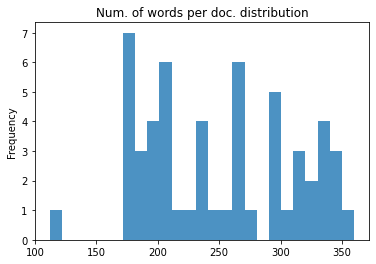

In [8]:
no_themes['num_words'].plot.hist(bins=25, alpha=0.8, legend=False, title="Num. of words per doc. distribution", xlabel='Words per doc.')

<AxesSubplot:title={'center':'Num. of keywords per doc. distribution'}, ylabel='Frequency'>

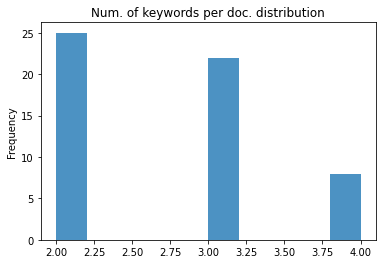

In [9]:
no_themes.num_themes.plot.hist(bins=10, alpha=0.8, legend=False, title="Num. of keywords per doc. distribution", xlabel='Keywords per doc.')

Counter({1: 59, 2: 44, 3: 29, 4: 15, 6: 1})


Text(0.5, 0, 'Length of themes')

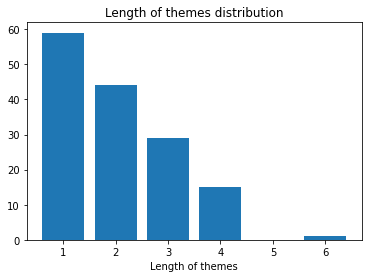

In [20]:
acc = []
for i, row in no_themes.iterrows():
    for theme in literal_eval(row['theme']):
        acc.append(len(theme.split()))
c = Counter(acc)
print(c)
plt.bar(c.keys(), c.values())
plt.title("Length of themes distribution")
plt.xlabel("Length of themes")

In [11]:
#no_themes.reset_index(drop=True, inplace=True)
#no_themes.to_csv('no/no_themes.csv')

# English datasets

## 500N-KPCrowd

In [3]:
en_kpcrowd = pd.read_csv('en/500N-KPCrowd.csv', index_col=0)
en_kpcrowd.head(5)

,text,duid,topic,num_words,keywords
0,Singer Michael Buble weds TV star Luisana Lopi...,20893614,art_and_culture,283,"['married Argentine', 'his Grammy', 'ceremony'..."
1,"Craig """"will do Larsson justice"""" Daniel Craig...",20900470,art_and_culture,264,"['role', 'American', 'board', 'Staermose', 'Da..."
2,Justin Bieber and Ashton Kutcher: the worst bu...,20902975,art_and_culture,541,"['production', 'coming', 'affinity', 'primaril..."
3,&#039;Bones&#039; Star Emily Deschanel pregnan...,20904497,art_and_culture,174,"['confirmed', 'year', 'pregnant', 'September',..."
4,&#039;Dark Shadows&#039; update: Chloe Moretz ...,20906308,art_and_culture,261,"['would play Carolyn', 'join cast', '039Dark S..."


Shape of data=> (386, 5)


<AxesSubplot:title={'center':'Num. of words per doc. distribution'}, ylabel='Frequency'>

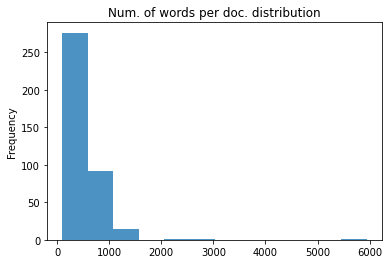

In [4]:
print("Shape of data=>", en_kpcrowd.shape)
en_kpcrowd.num_words.plot.hist(bins=12, alpha=0.8, legend=False, title="Num. of words per doc. distribution", xlabel='Words per doc.')

In [5]:
#en_kpcrowd[en_kpcrowd['num_words'] > round(en_kpcrowd["num_words"].quantile(0.99))].count() # with 99% quantile [1391 words] -> 4 rows removed
en_kpcrowd = en_kpcrowd[en_kpcrowd['num_words'] <= round(en_kpcrowd["num_words"].quantile(0.99))].reset_index(drop=True)

Shape of data=> (382, 5)


<AxesSubplot:title={'center':'Num. of words per doc. distribution'}, ylabel='Frequency'>

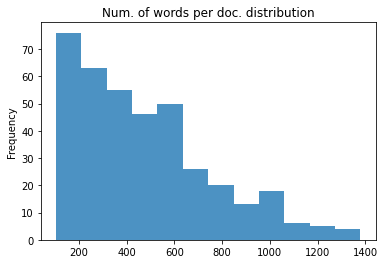

In [6]:
print("Shape of data=>", en_kpcrowd.shape)
en_kpcrowd.num_words.plot.hist(bins=12, alpha=0.8, legend=False, title="Num. of words per doc. distribution", xlabel='Words per doc.')

In [7]:
len(en_kpcrowd['text'].unique()) # 363 unique articles, let's remove the rest...

363

In [8]:
en_kpcrowd = en_kpcrowd.drop_duplicates(subset='text', keep="last").reset_index(drop=True)

<AxesSubplot:>

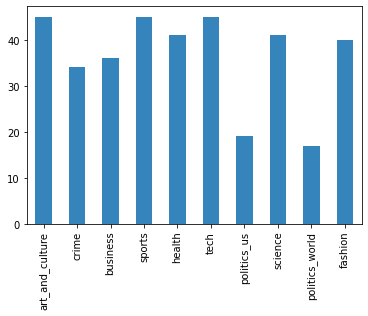

In [9]:
en_kpcrowd["topic"].value_counts(sort=False).plot(kind='bar', alpha=0.9)

<AxesSubplot:title={'center':'Num. of keywords per doc. distribution'}, ylabel='Frequency'>

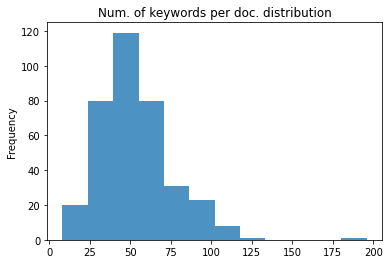

In [10]:
en_kpcrowd['keywords'] = en_kpcrowd.apply(lambda row: ast.literal_eval(row['keywords']), axis=1)
en_kpcrowd['num_keywords'] = en_kpcrowd.apply(lambda row: len(row['keywords']), axis=1)
en_kpcrowd.num_keywords.plot.hist(bins=12, alpha=0.8, legend=False, title="Num. of keywords per doc. distribution", xlabel='Keywords per doc.')

Text(0.5, 0, 'Length of keywords')

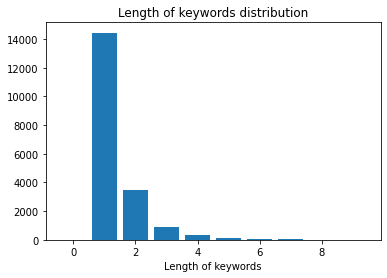

In [19]:
acc = []
for i, row in en_kpcrowd.iterrows():
    acc = acc + [len(kw.split()) for kw in row['keywords']]
c = Counter(acc)
plt.bar(c.keys(), c.values())
plt.title("Length of keywords distribution")
plt.xlabel("Length of keywords")

In [114]:
print("Shape of data=>", en_kpcrowd.shape)
en_kpcrowd.to_csv('en/en_kpcrowd.csv')
en_kpcrowd.head(5)

Shape of data=> (363, 6)


,text,duid,topic,num_words,keywords,num_keywords
0,Singer Michael Buble weds TV star Luisana Lopi...,20893614,art_and_culture,283,"[married Argentine, his Grammy, ceremony, kiss...",42
1,"Craig """"will do Larsson justice"""" Daniel Craig...",20900470,art_and_culture,264,"[role, American, board, Staermose, Daniel, ver...",50
2,Justin Bieber and Ashton Kutcher: the worst bu...,20902975,art_and_culture,541,"[production, coming, affinity, primarily, doub...",37
3,&#039;Bones&#039; Star Emily Deschanel pregnan...,20904497,art_and_culture,174,"[confirmed, year, pregnant, September, TV, emb...",44
4,&#039;Dark Shadows&#039; update: Chloe Moretz ...,20906308,art_and_culture,261,"[would play Carolyn, join cast, 039Dark Shadow...",21


### Since keywords are not sorted by relevance we keep all of them.

## KPTimes

In [20]:
en_kptimes = pd.read_csv('en/KPTimes.csv', index_col=0)
print("Shape of data=>", en_kptimes.shape)
en_kptimes.head(5)

Shape of data=> (19503, 6)


,duid,categories,headline,text,keywords,num_words
0,jp0000001,"['asia-pacific', 'offbeat-asia-pacific']",World records no joke to frustrated Pakistanis,ISLAMABAD - One young contender created the wo...,"['india', 'pakistan', 'guinness']",490
1,jp0000004,"['national', 'media-national']",Photo report: FOODEX Japan 2013,FoodEx is the largest trade exhibition for foo...,"['japanese food', 'japan pulse', 'foodex']",178
2,jp0000005,['business'],'Abenomists' beware: Rising prices just one pi...,The Bank of Japan on Wednesday installed a new...,"['boj', 'abenomics', 'economics', 'weak yen']",955
3,jp0000007,"['national', 'media-national']",Google Street Views goes inside a Fukushima sc...,"As everyone knows, Google Street Views lets yo...","['fukushima', 'tsunami', 'earthquake', '3.11',...",178
4,jp0000008,['reference'],The 5 p.m. bell,"Dear Alice, I live in a medium-size city in Sa...","['5 p.m. chime', 'disaster warning']",995


In [21]:
len(en_kptimes['text'].unique()) # 1 non-unique article, let's remove it

19502

In [22]:
en_kptimes = en_kptimes.drop_duplicates(subset='text', keep="last").reset_index(drop=True)

<AxesSubplot:title={'center':'Num. of words per doc. distribution'}, ylabel='Frequency'>

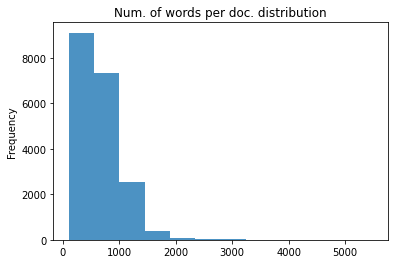

In [23]:
en_kptimes.num_words.plot.hist(bins=12, alpha=0.8, legend=False, title="Num. of words per doc. distribution", xlabel='Words per doc.')

In [24]:
#en_kptimes[en_kptimes['num_words'] > round(en_kptimes["num_words"].quantile(0.99))].count() # with 99% quantile [1781 words] -> 195 rows removed
en_kptimes = en_kptimes[en_kptimes['num_words'] <= round(en_kptimes["num_words"].quantile(0.99))].reset_index(drop=True)

<AxesSubplot:title={'center':'Num. of words per doc. distribution'}, ylabel='Frequency'>

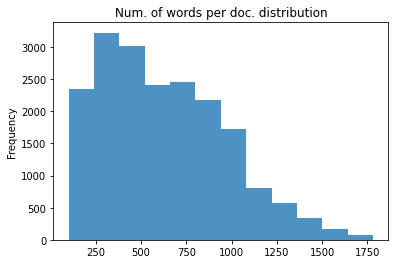

In [25]:
en_kptimes.num_words.plot.hist(bins=12, alpha=0.8, legend=False, title="Num. of words per doc. distribution", xlabel='Words per doc.')

<AxesSubplot:title={'center':'Num. of keywords per doc. distribution'}, ylabel='Frequency'>

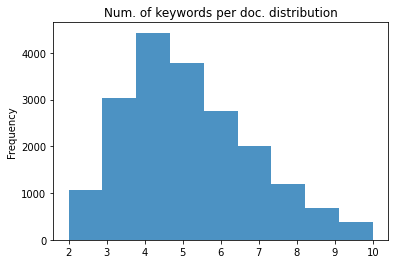

In [26]:
en_kptimes['categories'] = en_kptimes.apply(lambda row: ast.literal_eval(row['categories']), axis=1)
en_kptimes['keywords'] = en_kptimes.apply(lambda row: ast.literal_eval(row['keywords']), axis=1)
en_kptimes['num_keywords'] = en_kptimes.apply(lambda row: len(row['keywords']), axis=1)
en_kptimes.num_keywords.plot.hist(bins=9, alpha=0.8, legend=False, title="Num. of keywords per doc. distribution", xlabel='Keywords per doc.')

Text(0.5, 0, 'Length of keywords')

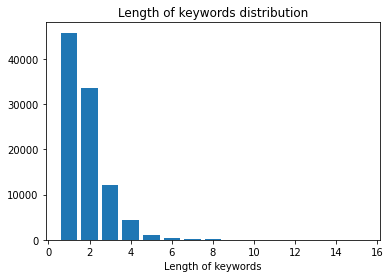

In [27]:
acc = []
for i, row in en_kptimes.iterrows():
    acc = acc + [len(kw.split()) for kw in row['keywords']]
c = Counter(acc)
plt.bar(c.keys(), c.values())
plt.title("Length of keywords distribution")
plt.xlabel("Length of keywords")

<AxesSubplot:title={'center':'Num. of category tags per doc. distribution'}, ylabel='Frequency'>

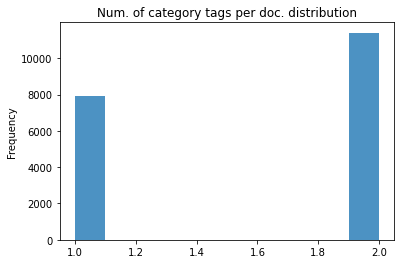

In [10]:
en_kptimes['num_categories'] = en_kptimes.apply(lambda row: len(ast.literal_eval(row['categories'])), axis=1)
en_kptimes.num_categories.plot.hist(alpha=0.8, legend=False, title="Num. of category tags per doc. distribution", xlabel='Categories per doc.')

In [13]:
tags = []
for i, row in en_kptimes.iterrows():
    for tag in ast.literal_eval(row['categories']):
        tags.append(tag)
tags = set(tags)
print(f'Found {len(tags)} different tags like: {list(tags)[:5]}')

Found 94 different tags like: ['what-in-the-world', 'playmagazine', 'rugby', 'politics', 'earth']


In [14]:
print("Shape of data=>", en_kptimes.shape)
en_kptimes.to_csv('en/en_kptimes.csv')
en_kptimes.head(5)

Shape of data=> (19307, 8)


,duid,categories,headline,text,keywords,num_words,num_keywords,num_categories
0,jp0000001,"['asia-pacific', 'offbeat-asia-pacific']",World records no joke to frustrated Pakistanis,ISLAMABAD - One young contender created the wo...,"['india', 'pakistan', 'guinness']",490,3,2
1,jp0000004,"['national', 'media-national']",Photo report: FOODEX Japan 2013,FoodEx is the largest trade exhibition for foo...,"['japanese food', 'japan pulse', 'foodex']",178,3,2
2,jp0000005,['business'],'Abenomists' beware: Rising prices just one pi...,The Bank of Japan on Wednesday installed a new...,"['boj', 'abenomics', 'economics', 'weak yen']",955,4,1
3,jp0000007,"['national', 'media-national']",Google Street Views goes inside a Fukushima sc...,"As everyone knows, Google Street Views lets yo...","['fukushima', 'tsunami', 'earthquake', '3.11',...",178,5,2
4,jp0000008,['reference'],The 5 p.m. bell,"Dear Alice, I live in a medium-size city in Sa...","['5 p.m. chime', 'disaster warning']",995,2,1


## SemEval2017

In [28]:
en_eval17 = pd.read_csv('en/SemEval2017.csv', index_col=0)
print("Shape of data=>", en_eval17.shape)
en_eval17.head(5)

Shape of data=> (453, 4)


,text,duid,num_words,keywords
0,"Complex Langevin (CL) dynamics [1,2] provides...",S0003491613001516,183,"['CL', 'complexified configuration space', 'Co..."
1,Nuclear theory devoted major efforts since 4 d...,S0003491615000433,198,"['C60', 'combining quantum features', 'field o..."
2,The next important step might be the derivatio...,S0003491615001505,182,"['continuum space-time', 'Dirac equation', 'fu..."
3,This work shows how our approach based on the ...,S0003491615001839,173,"['class virial expansions', 'field partition f..."
4,A fluctuating vacuum is a general feature of q...,S0003491615001955,170,['a collection of fermionic fields describing ...


In [29]:
len(en_eval17['text'].unique())

453

<AxesSubplot:title={'center':'Num. of words per doc. distribution'}, ylabel='Frequency'>

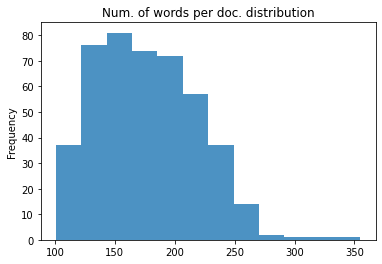

In [30]:
en_eval17.num_words.plot.hist(bins=12, alpha=0.8, legend=False, title="Num. of words per doc. distribution", xlabel='Words per doc.')

In [31]:
#en_eval17[en_eval17['num_words'] > round(en_eval17["num_words"].quantile(0.99))].count() # with 99% quantile [270 words] -> 5 rows removed
en_eval17 = en_eval17[en_eval17['num_words'] <= round(en_eval17["num_words"].quantile(0.99))].reset_index(drop=True)

<AxesSubplot:title={'center':'Num. of words per doc. distribution'}, ylabel='Frequency'>

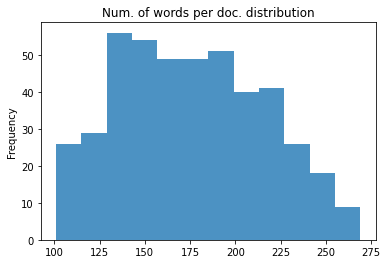

In [32]:
en_eval17.num_words.plot.hist(bins=12, alpha=0.8, legend=False, title="Num. of words per doc. distribution", xlabel='Words per doc.')

<AxesSubplot:title={'center':'Num. of keywords per doc. distribution'}, ylabel='Frequency'>

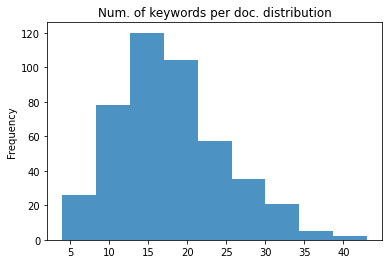

In [33]:
en_eval17['keywords'] = en_eval17.apply(lambda row: ast.literal_eval(row['keywords']), axis=1)
en_eval17['num_keywords'] = en_eval17.apply(lambda row: len(row['keywords']), axis=1)
en_eval17.num_keywords.plot.hist(bins=9, alpha=0.8, legend=False, title="Num. of keywords per doc. distribution", xlabel='Keywords per doc.')

Text(0.5, 0, 'Length of keywords')

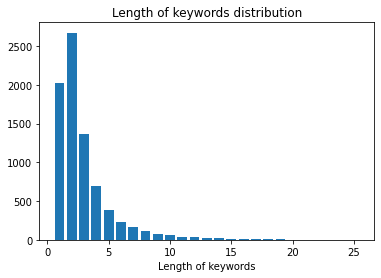

In [34]:
acc = []
for i, row in en_eval17.iterrows():
    acc = acc + [len(kw.split()) for kw in row['keywords']]
c = Counter(acc)
plt.bar(c.keys(), c.values())
plt.title("Length of keywords distribution")
plt.xlabel("Length of keywords")

In [42]:
print("Shape of data=>", en_eval17.shape)
en_eval17.to_csv('en/en_semeval2017.csv')
en_eval17.head(5)

Shape of data=> (448, 5)


,text,duid,num_words,keywords,num_keywords
0,"Complex Langevin (CL) dynamics [1,2] provides...",S0003491613001516,183,"[CL, complexified configuration space, Complex...",14
1,Nuclear theory devoted major efforts since 4 d...,S0003491615000433,198,"[C60, combining quantum features, field of clu...",20
2,The next important step might be the derivatio...,S0003491615001505,182,"[continuum space-time, Dirac equation, future ...",13
3,This work shows how our approach based on the ...,S0003491615001839,173,"[class virial expansions, field partition func...",16
4,A fluctuating vacuum is a general feature of q...,S0003491615001955,170,[a collection of fermionic fields describing c...,14
